In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import DatasetFolder
from PIL import Image

In [3]:
print(torch.__version__)

2.0.1


In [4]:
import os
from pathlib import Path
path=Path('data/train')

In [5]:
image_folder_path = "data/train"
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize images to a desired size
    transforms.ToTensor(),         # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the image data
])
train_dataset = datasets.ImageFolder(root=image_folder_path, transform=transform)
train_data_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
len(train_data_loader)

1313

In [7]:
l=[]
for i in range(28000):
    l.append(Path(f'data/Testing/0/{i}.jpg'))
l[:2]

[PosixPath('data/Testing/0/0.jpg'), PosixPath('data/Testing/0/1.jpg')]

In [8]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [9]:
def find_classes(directory='data/Testing') -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory."""
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}... please check file structure.")

    # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [10]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self, 
               targ_dir: list, 
               transform=None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = targ_dir
    # Setup transform
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes()

  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it with three color channels."
    image_path = self.paths[index]
    image = Image.open(image_path)

    # Convert the image to RGB if it has a different mode
    if image.mode != 'RGB':
        image = image.convert('RGB')

    return image

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)
  
  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # return untransformed image and label

In [11]:
test_data_set_custom = ImageFolderCustom(targ_dir=l,transform=transform)
test_data_set_custom

In [12]:
test_data_loader = DataLoader(test_data_set_custom, batch_size=32, shuffle=False)
len(test_data_loader)

875

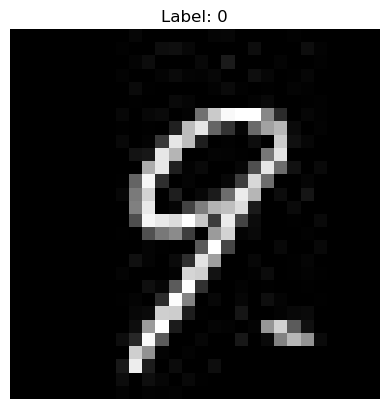

In [13]:
fig = plt.figure()

for images, labels in test_data_loader:
    image = images[2]  # Extract the image from the batch (assuming batch size is 1)
    label = labels[2]  # Extract the label from the batch (assuming batch size is 1)

    # Convert the tensor image to a numpy array and transpose the dimensions
    image = image.numpy().transpose((1, 2, 0))

    # Reverse the normalization applied earlier
    image = 0.5 * image + 0.5

    # Plot the image
    plt.imshow(image)
    plt.title("Label: {}".format(label))
    plt.axis("off")
    plt.show()
    break

In [55]:
image.shape

(28, 28, 3)

In [14]:
class_names=train_dataset.classes
train_dataset.class_to_idx

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


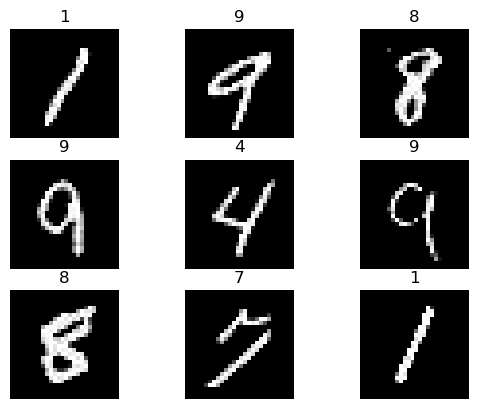

In [15]:
# torch.manual_seed(42)
def plt_gray(train_data=train_dataset,rows=3,cols=3):
    for i in range(1,(rows*cols)+1):
        ridx=torch.randint(0,high=len(train_data),size=[1]).item()
        plt.subplot(rows,cols,i)
        image,label=train_data[ridx]
        plt.imshow(image.permute(1,2,0),cmap='gray')
        plt.title(class_names[label])
        plt.axis(False)
plt_gray()

In [16]:
image,label=train_dataset[0]
image.shape

torch.Size([3, 28, 28])

In [17]:
# Building simple non linear Conv cArchitecture
from torch import nn

In [18]:
class ClASSICMINISTCNN_V0(nn.Module):
    def __init__(self,input_shape,hidden_units,output_shape):
        super().__init__()
        self.cnn_1 = nn.Sequential(
                                    nn.Conv2d(
                                                in_channels=input_shape,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1
                                            ),
                                    nn.ReLU(),
                                    nn.Conv2d(
                                                in_channels=hidden_units,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1
                                            ),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2,stride=2)
                                ) 
        self.cnn_2=nn.Sequential(
                                    nn.Conv2d(
                                                in_channels=hidden_units,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1
                                            ),
                                    nn.ReLU(),
                                    nn.Conv2d(
                                                in_channels=hidden_units,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1
                                            ),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2,stride=2)
                                )
        self.classifier=nn.Sequential(
                                    nn.Flatten(),
                                    nn.Linear(
                                                in_features=hidden_units*7*7,
                                                out_features=output_shape
                                            )
                                    )
    def forward(self,x):
#         print(f'x:{x.shape}')
        x= self.cnn_1(x)
#         print(f'out of conv_1:{x.shape}')
        x= self.cnn_2(x)
#         print(f'out of conv_2:{x.shape}')
        return self.classifier(x)

In [19]:
model_cnn_1=ClASSICMINISTCNN_V0(input_shape=3,hidden_units=10,output_shape=10)
model_cnn_1

ClASSICMINISTCNN_V0(
  (cnn_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [20]:
dummy_img=torch.rand([1,3,28,28])
dummy_img.shape

torch.Size([1, 3, 28, 28])

In [21]:
dummy_model=ClASSICMINISTCNN_V0(input_shape=3,hidden_units=10,output_shape=10)
dummy_output=dummy_model(dummy_img)
dummy_output.shape

torch.Size([1, 10])

In [22]:
import requests 
from pathlib import Path

if Path('helper_functions.py').is_file():
    print('Already exists skipping download')
else:
    print('Downloading the helper functions')
    request=requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/going_modular/going_modular/engine.py')
    with open('helper_functions.py','wb') as f:
        f.write(request.content)
print('Setup completed')

Already exists skipping download
Setup completed


In [23]:
# Loss fn and optimer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_cnn_1.parameters(),lr=0.1)

In [26]:
from helper_functions import *
from tqdm.auto import tqdm

In [28]:
EPOCHS=5
from timeit import default_timer as timer
start_time = timer() 

# Train model_0
model_cnn_1_results = train(model=model_cnn_1,
                        train_dataloader=train_data_loader,
                        test_dataloader=test_data_loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=EPOCHS,
                           device='cpu')

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.3018 | train_acc: 0.9003 | test_loss: 11.0075 | test_acc: 0.0979
Epoch: 2 | train_loss: 0.0700 | train_acc: 0.9784 | test_loss: 16.6177 | test_acc: 0.0989
Epoch: 3 | train_loss: 0.0544 | train_acc: 0.9830 | test_loss: 12.6106 | test_acc: 0.0990
Epoch: 4 | train_loss: 0.0445 | train_acc: 0.9859 | test_loss: 17.1390 | test_acc: 0.0975
Epoch: 5 | train_loss: 0.0407 | train_acc: 0.9869 | test_loss: 18.3140 | test_acc: 0.0981
Total training time: 231.005 seconds


In [30]:
model_cnn_1_results

{'train_loss': [0.3018259678814618,
  0.06995558529032354,
  0.05443237841298917,
  0.04452628518689478,
  0.04074075306492186],
 'train_acc': [0.900252284843869,
  0.9784129855293222,
  0.9830302741812643,
  0.9859339299314547,
  0.9868621477532369],
 'test_loss': [11.007537443978446,
  16.61766008431571,
  12.610556296212332,
  17.1390349949428,
  18.31397763497489],
 'test_acc': [0.09789285714285714,
  0.09892857142857144,
  0.09903571428571428,
  0.09753571428571428,
  0.09814285714285714]}

In [31]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary."""
  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how mnay epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend() 

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();
     

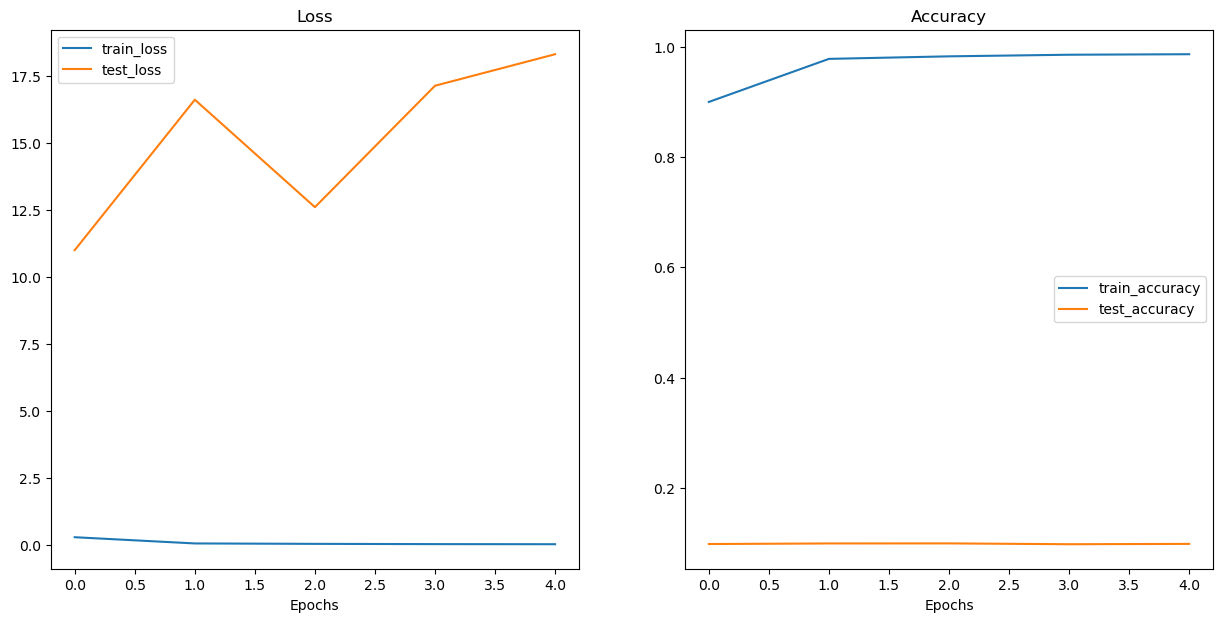

In [32]:
plot_loss_curves(model_cnn_1_results)

In [29]:
#Building preds loop
EPOCHS=1
all_labes=[]
for epoch in range(EPOCHS):
    model_cnn_1.eval()
    for batch, (X, y) in enumerate(test_data_loader):
        with torch.inference_mode():
            preds_logits=model_cnn_1(X)
            pred_labels = preds_logits.argmax(dim=1)
            lab=pred_labels.numpy()
            all_labes=np.concatenate((all_labes, lab))
#         print(batch)
#         break

In [34]:
all_labes=all_labes.astype(int)
all_labes

array([2, 0, 9, ..., 3, 9, 2])

In [35]:
from pathlib import Path
import pandas as pd
import os
compe='digit-recognizer'

In [36]:
import subprocess
def make_sub(pred_y,sub_data_len=28000,name='default'):
    df_submission = pd.DataFrame()
    df_submission['ImageId']=range(1, sub_data_len+ 1)
    df_submission['Label']=pred_y
    df_submission.to_csv(f'submission-{name}.csv', index=False)
    cmd =f'kaggle competitions submit -c {compe} -f submission-{name}.csv -m "Message"'
    subprocess.run(cmd, shell=True)
    print(f'succesully saved - {name}')

In [37]:
make_sub(all_labes,name='pytorch_custom_dataset2')

100%|██████████| 208k/208k [00:00<00:00, 218kB/s]  


Successfully submitted to Digit Recognizersuccesully saved - pytorch_custom_dataset2


In [38]:
all_labes[:20]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0])

In [ ]:
x